In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

In [3]:
sleep_df = pd.read_csv("../project-1/Resources/Sleep_health_and_lifestyle_dataset.csv")
sleep_df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


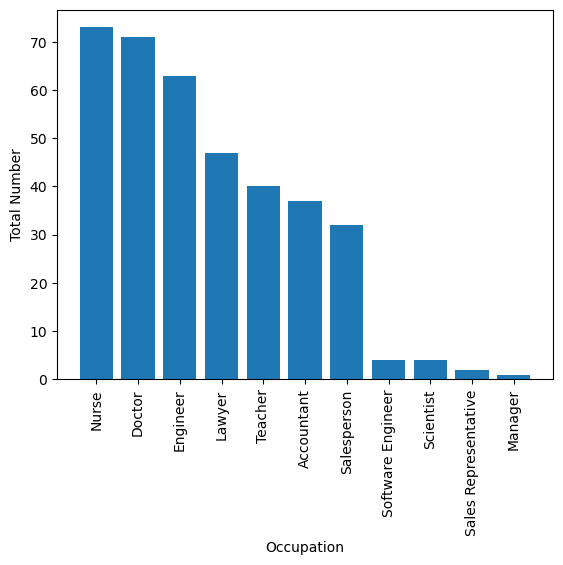

In [4]:
plt.bar(sleep_df["Occupation"].value_counts().index.values, sleep_df["Occupation"].value_counts().values)
plt.xticks(rotation = 90)
plt.xlabel("Occupation")
plt.ylabel("Total Number")
plt.show()

In [5]:
value_counts = sleep_df["Occupation"].value_counts()
remove = value_counts[value_counts < 30].index
sleep_df_clean = sleep_df[~sleep_df["Occupation"].isin(remove)]
sleep_df_clean.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
6,7,Male,29,Teacher,6.3,6,40,7,Obese,140/90,82,3500,Insomnia
7,8,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,None
8,9,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,None


In [6]:
occupation_df = pd.DataFrame({
    "Mean Sleep Duration": sleep_df_clean.groupby(["Occupation"])["Sleep Duration"].mean(),
    "Mean Sleep Quality": sleep_df_clean.groupby(["Occupation"])["Quality of Sleep"].mean(),
})
occupation_df

,Mean Sleep Duration,Mean Sleep Quality
Occupation,,
Accountant,7.113514,7.891892
Doctor,6.970423,6.647887
Engineer,7.987302,8.412698
Lawyer,7.410638,7.893617
Nurse,7.063014,7.369863
Salesperson,6.403125,6.000000
Teacher,6.690000,6.975000


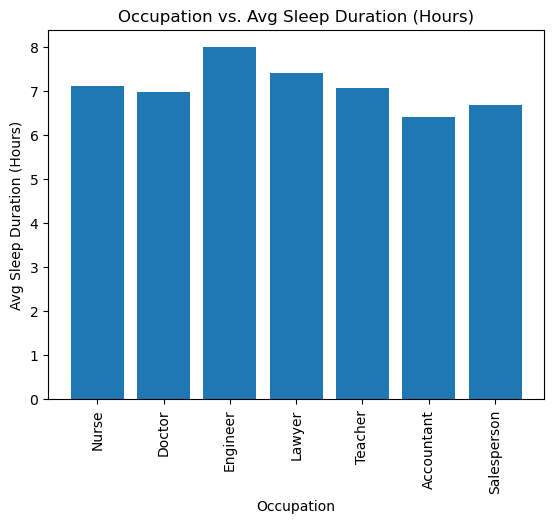

In [16]:
plt.bar(sleep_df_clean["Occupation"].value_counts().index.values, 
        sleep_df_clean.groupby(["Occupation"])["Sleep Duration"].mean())
plt.xticks(rotation = 90)
plt.xlabel("Occupation")
plt.ylabel("Avg Sleep Duration (Hours)")
plt.title("Occupation vs. Avg Sleep Duration (Hours)")
plt.show()

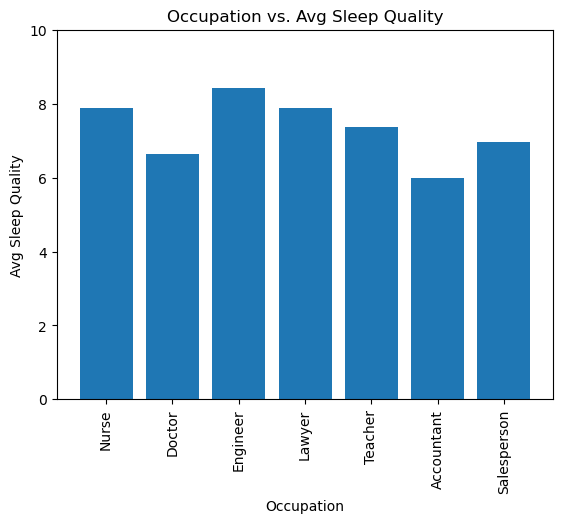

In [8]:
plt.bar(sleep_df_clean["Occupation"].value_counts().index.values ,
        sleep_df_clean.groupby(["Occupation"])["Quality of Sleep"].mean())
plt.xticks(rotation = 90)
plt.xlabel("Occupation")
plt.ylabel("Avg Sleep Quality")
plt.title("Occupation vs. Avg Sleep Quality")
plt.ylim(0,10)
plt.show()

In [9]:
gender_df = pd.DataFrame({
    "Mean Sleep Duration": sleep_df_clean.groupby(["Gender"])["Sleep Duration"].mean(),
    "Mean Sleep Quality": sleep_df_clean.groupby(["Gender"])["Quality of Sleep"].mean(),
})
gender_df

,Mean Sleep Duration,Mean Sleep Quality
Gender,,
Female,7.258889,7.727778
Male,7.055191,7.010929


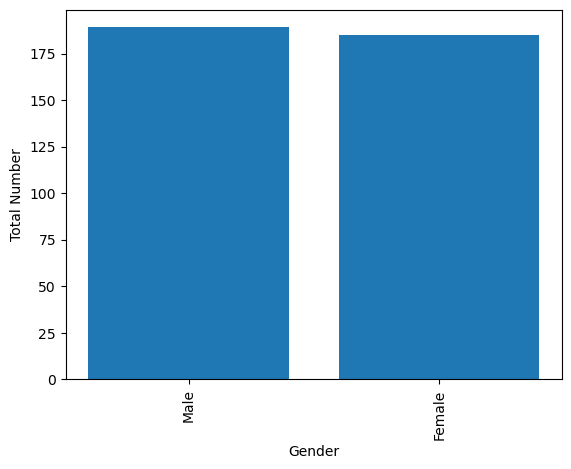

In [12]:
plt.bar(sleep_df["Gender"].value_counts().index.values, sleep_df["Gender"].value_counts().values)
plt.xticks(rotation = 90)
plt.xlabel("Gender")
plt.ylabel("Total Number")
plt.show()

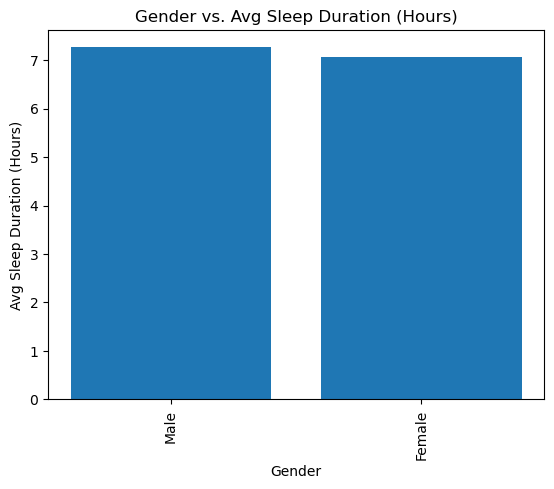

In [10]:
plt.bar(sleep_df_clean["Gender"].value_counts().index.values ,sleep_df_clean.groupby(["Gender"])["Sleep Duration"].mean())
plt.xticks(rotation = 90)
plt.xlabel("Gender")
plt.ylabel("Avg Sleep Duration (Hours)")
plt.title("Gender vs. Avg Sleep Duration (Hours)")
plt.show()

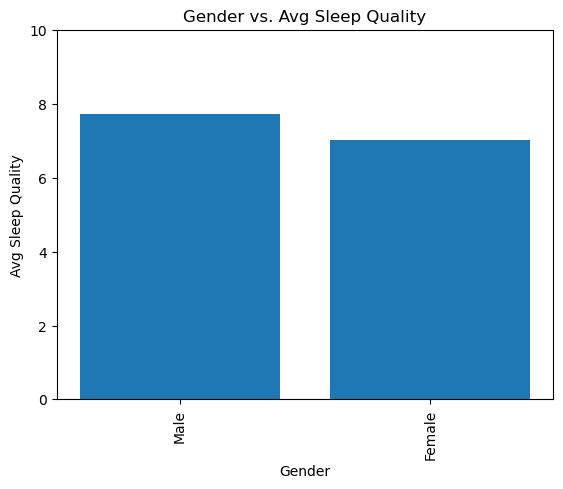

In [17]:
plt.bar(sleep_df_clean["Gender"].value_counts().index.values ,sleep_df_clean.groupby(["Gender"])["Quality of Sleep"].mean())
plt.xticks(rotation = 90)
plt.xlabel("Gender")
plt.ylabel("Avg Sleep Quality")
plt.title("Gender vs. Avg Sleep Quality")
plt.ylim(0,10)
plt.show()

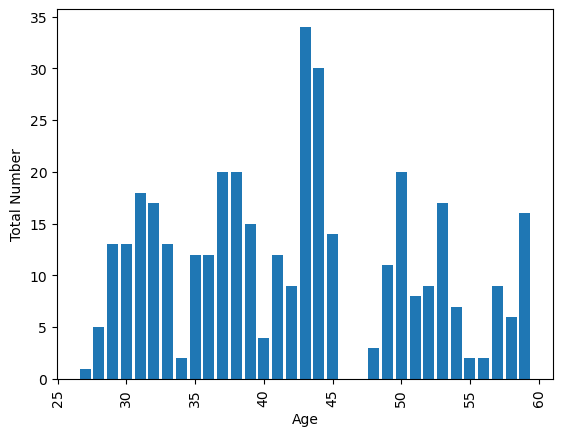

In [13]:
plt.bar(sleep_df["Age"].value_counts().index.values, sleep_df["Age"].value_counts().values)
plt.xticks(rotation = 90)
plt.xlabel("Age")
plt.ylabel("Total Number")
plt.show()

In [23]:

bins = [0,30,40,50,60]
labels = ["Younger than 30","30 to 40","40 to 50","50 to 60"]
sleep_df_clean['Age Bracket'] = pd.cut(sleep_df_clean['Age'], bins=bins, labels=labels, include_lowest=True)

age_df = pd.DataFrame({
    "Mean Sleep Duration": sleep_df_clean.groupby(["Age Bracket"])["Sleep Duration"].mean(),
    "Mean Sleep Quality": sleep_df_clean.groupby(["Age Bracket"])["Quality of Sleep"].mean(),
})
age_df

/var/folders/63/qn1gl03j5nn2mbv8p40ykqm00000gn/T/ipykernel_89909/783718939.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sleep_df_clean['Age Bracket'] = pd.cut(sleep_df_clean['Age'], bins=bins, labels=labels, include_lowest=True)


,Mean Sleep Duration,Mean Sleep Quality
Age Bracket,,
Younger than 30,7.053571,6.392857
30 to 40,7.057480,7.362205
40 to 50,6.775758,6.810606
50 to 60,8.019737,8.697368


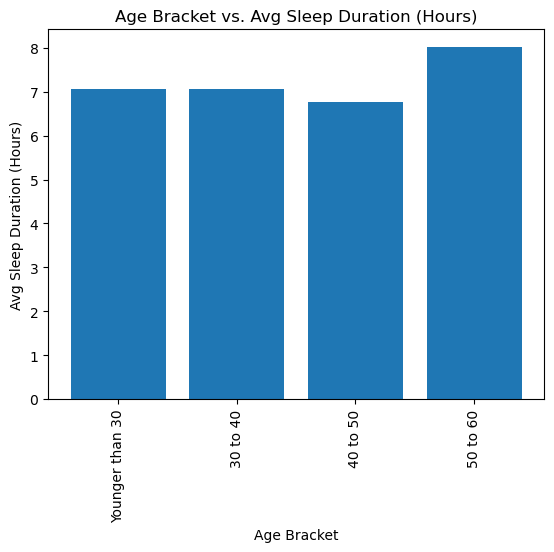

In [26]:
plt.bar(sleep_df_clean["Age Bracket"].value_counts().index.values ,sleep_df_clean.groupby(["Age Bracket"])["Sleep Duration"].mean())
plt.xticks([0,1,2,3],["Younger than 30","30 to 40","40 to 50","50 to 60"], rotation = 90)
plt.xlabel("Age Bracket")
plt.ylabel("Avg Sleep Duration (Hours)")
plt.title("Age Bracket vs. Avg Sleep Duration (Hours)")
plt.show()